# Distance Attention

Last Update : 22 June 2019

**Aim**: 


In [1]:
N_THREADS = 8
# Nota Bene : notebooks don't deallocate GPU memory
IS_FORCE_CPU = False # can also be set in the trainer

## Environment

In [2]:
cd ..

/master


In [3]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CENTER PLOTS
from IPython.core.display import HTML
display(HTML(""" <style> .output_png {display: table-cell; text-align: center; margin:auto; }
.prompt display:none;}  </style>"""))

import os
if IS_FORCE_CPU:
    os.environ['CUDA_VISIBLE_DEVICES'] = ""
    
import sys
sys.path.append("notebooks")

import numpy as np
import matplotlib.pyplot as plt
import torch
torch.set_num_threads(N_THREADS)

Autosaving every 600 seconds


## Dataset

The dataset we will be using are simple functions sampled from different Gaussian kernel. See [Tutorial 1 - Conditional Neural Process] for more details.

[Tutorial 1 - Conditional Neural Process]: Tutorial%201%20-%20Conditional%20Neural%20Process.ipynb

In [4]:
from utils.visualize import plot_posterior_samples, plot_prior_samples, plot_dataset_samples
from ntbks_helpers import get_gp_datasets # defined in first tutorial (CNP)

X_DIM = 1  # 1D spatial input
Y_DIM = 1  # 1D regression
N_POINTS = 128
N_SAMPLES = 100000 # this is a lot and can work with less
datasets = get_gp_datasets(n_samples=N_SAMPLES, n_points=N_POINTS)

## Model


In [5]:
import torch.nn as nn
from neuralproc import AttentiveNeuralProcess, DiscardIthArg
from neuralproc.utils.helpers import change_param
from neuralproc.utils.torchextend import MLP
from ntbks_helpers import CNP_KWARGS # defined in first tutorial (CNP)


ANP_KWARGS = CNP_KWARGS.copy()
ANP_KWARGS["attention"] = "weighted_dist"
ANP_KWARGS["XEncoder"] = nn.Identity
ANP_KWARGS["XYEncoder"] = change_param(DiscardIthArg, i=0, To=change_param(MLP, n_hidden_layers=2))
ANP_KWARGS["Decoder"] = change_param(DiscardIthArg, i=0, To=change_param(MLP, n_hidden_layers=4))
ANP_KWARGS["x_transf_dim"] = 1

# initialize one model for each dataset
data_models = {name: (AttentiveNeuralProcess(X_DIM, Y_DIM, **ANP_KWARGS), data) 
                   for name, data in datasets.items()}

### N Param

Number of parameters (note that I did not play around with this much, this depends a lot on the representation size):

In [6]:
from utils.helpers import count_parameters

In [7]:
for k, (neural_proc, dataset) in data_models.items():
    print("N Param:", count_parameters(neural_proc))
    break

N Param: 12708


Using `"transformer"` attention increases the number of parameters, but using a deterministic path as well a smaller representation seize decreases the number of parameters.

## Training

In [8]:
from ntbks_helpers import train_all_models_

train_all_models_(data_models, "results/notebooks/neural_process/anp_dist",
                  is_retrain=False) # if false load precomputed


--- Training rbf ---



  epoch    train_loss    cp      dur
-------  ------------  ----  -------
      1        1.0424     +  16.3433


      2        0.7055     +  15.9315


      3        0.4755     +  16.4000


      4        0.3291     +  14.9202


      5        0.2366     +  14.3928


      6        0.1458     +  14.4039


      7        0.0678     +  14.4231


      8        0.0278     +  16.2682


      9        0.0178     +  16.3176


     10        0.0057     +  15.8811


     11        0.0028     +  16.3903


     12       -0.0479     +  16.3301


     13       -0.0742     +  16.3803


     14       -0.0975     +  16.4234


     15       -0.0614        17.8882


     16       -0.0972        17.7527


     17       -0.0956        18.1348


     18       -0.1081     +  17.8160


     19       -0.1007        18.2315


     20       -0.0743        17.8970


     21       -0.1303     +  15.9525


     22       -0.1033        17.4922


     23       -0.1329     +  17.1666


     24       -0.0968        18.0094


     25       -0.1445     +  17.7282


     26       -0.0990        18.3406


     27       -0.1345        18.0718


     28       -0.1429        18.3396


     29       -0.0985        18.1391


     30       -0.1443        16.7708


     31       -0.0816        18.2410


     32       -0.1298        18.0477


     33       -0.1778     +  17.2740


     34       -0.1341        17.3093


     35       -0.1698        17.4839


     36       -0.1376        17.9269


     37       -0.1714        17.6523


     38       -0.1477        17.8241


     39       -0.1710        18.8036


     40       -0.1664        18.0633


     41       -0.1324        18.3566


     42       -0.1617        18.0396


     43       -0.1705        18.0724


     44       -0.1227        18.7603


     45       -0.1388        17.9733


     46       -0.1545        18.3002


     47       -0.1315        18.2590


     48       -0.1380        18.9470


     49       -0.1491        18.3782


     50       -0.1609        18.0536
Re-initializing optimizer.

--- Training periodic ---



  epoch    train_loss    cp      dur
-------  ------------  ----  -------
      1        1.2675     +  18.0497


      2        1.2356     +  17.6377


      3        1.2068     +  18.2033


      4        1.1695     +  17.6895


      5        1.1350     +  18.3341


      6        1.0833     +  18.6370


      7        1.0450     +  17.9422


      8        1.0129     +  18.1679


      9        0.9866     +  18.0353


     10        0.9665     +  18.0275


     11        0.9322     +  18.1292


     12        0.9310     +  17.4377


     13        0.9051     +  18.0553


     14        0.8948     +  16.6039


     15        0.8990        17.2726


     16        0.8937     +  17.8261


     17        0.8643     +  17.3887


     18        0.8658        16.1565


     19        0.8698        16.9605


     20        0.8525     +  17.6567


     21        0.8464     +  17.4192


     22        0.8614        18.3652


     23        0.8541        17.8863


     24        0.8514        18.3212


     25        0.8378     +  18.1581


     26        0.8473        18.5053


     27        0.8550        18.4657


     28        0.8385        17.2240


     29        0.8253     +  18.3831


     30        0.8343        17.8646


     31        0.8391        18.2235


     32        0.8328        17.2477


     33        0.8080     +  18.5356


     34        0.8329        18.3979


     35        0.8433        18.1368


     36        0.8316        18.4628


     37        0.8397        17.7428


     38        0.8268        16.7451


     39        0.8245        17.9272


     40        0.8258        17.3075


     41        0.8380        18.0735


     42        0.8378        18.0156


     43        0.8412        18.3219


     44        0.8294        18.6106


     45        0.8482        18.1178


     46        0.8210        18.8767


     47        0.8108        17.7465


     48        0.8230        18.0662


     49        0.8400        18.2955


     50        0.8230        16.2465
Re-initializing optimizer.

--- Training matern ---



  epoch    train_loss    cp      dur
-------  ------------  ----  -------
      1        0.9108     +  17.0275


      2        0.6976     +  17.7357


      3        0.5571     +  18.0736


      4        0.4662     +  17.4996


      5        0.4053     +  17.8652


      6        0.3445     +  16.8116


      7        0.3058     +  15.6955


      8        0.2619     +  17.7953


      9        0.2276     +  16.6552


     10        0.1439     +  19.1305


     11        0.1653        17.7265


     12        0.1369     +  17.1111


     13        0.1725        17.8183


     14        0.1397        17.8884


     15        0.1243     +  17.4917


     16        0.1081     +  17.8510


     17        0.1248        16.7411


     18        0.1037     +  17.3193


     19        0.1025     +  17.8820


     20        0.1065        18.1082


     21        0.0900     +  17.5507


     22        0.1149        16.8124


     23        0.0806     +  17.8616


     24        0.0998        17.6883


     25        0.0814        16.8925


     26        0.1018        17.8807


     27        0.1106        17.3788


     28        0.0774     +  18.0247


     29        0.1039        17.6702


     30        0.0762     +  17.7876


     31        0.0929        17.7651


     32        0.0525     +  18.4532


     33        0.0687        17.7521


     34        0.0673        18.4677


     35        0.0844        17.7523


     36        0.0800        17.6353


     37        0.0841        18.3651


     38        0.0752        17.6332


     39        0.0708        18.5502


     40        0.0682        18.0339


     41        0.0875        17.1786


     42        0.0612        18.1528


     43        0.0517     +  16.8293


     44        0.0623        17.8440


     45        0.0735        17.7871


     46        0.0609        18.3157


     47        0.0570        17.7318


     48        0.0529        18.2649


     49        0.0395     +  17.7528


     50        0.0633        18.6678
Re-initializing optimizer.

--- Training noisy-matern ---



  epoch    train_loss    cp      dur
-------  ------------  ----  -------
      1        1.0166     +  17.2316


      2        0.8503     +  17.5496


      3        0.7759     +  17.6941


      4        0.7098     +  17.8955


      5        0.6535     +  17.6594


      6        0.6164     +  17.7537


      7        0.5892     +  17.9513


      8        0.5569     +  18.1324


      9        0.5408     +  17.2860


     10        0.5282     +  18.1917


     11        0.5369        17.2534


     12        0.4999     +  17.6742


     13        0.4909     +  17.0185


     14        0.4846     +  17.1761


     15        0.4806     +  18.4382


     16        0.4836        16.1410


     17        0.4771     +  18.1735


     18        0.4544     +  18.0960


     19        0.4583        18.1139


     20        0.4536     +  17.9759


     21        0.4538        18.4708


     22        0.4674        18.2554


     23        0.4509     +  18.2686


     24        0.4252     +  18.0992


     25        0.4496        18.3018


     26        0.4455        17.7801


     27        0.4354        17.6598


     28        0.4536        17.4098


     29        0.4405        17.1888


     30        0.4158     +  17.7369


     31        0.4406        17.9754


     32        0.4379        16.7691


     33        0.4295        17.7233


     34        0.4393        18.5921


     35        0.4300        18.6553


     36        0.4554        17.7315


     37        0.4394        17.8650


     38        0.4327        16.8590


     39        0.4413        18.3336


     40        0.4181        16.1173


     41        0.4189        17.9648


     42        0.4511        17.9084


     43        0.4263        17.5677


     44        0.4267        18.2839


     45        0.4393        17.9774


     46        0.4149     +  17.9370


     47        0.4251        18.0447


     48        0.4424        18.9368


     49        0.4310        18.6250


     50        0.4290        16.6873
Re-initializing optimizer.


# Inference

## Trained Prior

In [9]:
EXTRAP_DISTANCE = 1.5  # add 1.5 to the right for extrapolation
INTERPOLATION_RANGE = dataset.min_max
EXTRAPOLATION_RANGE = (dataset.min_max[0], dataset.min_max[1]+EXTRAP_DISTANCE )

std: 0.4917879748344421
std: 0.8021861159801483
std: 0.5363950842618944
std: 0.6138373386859892


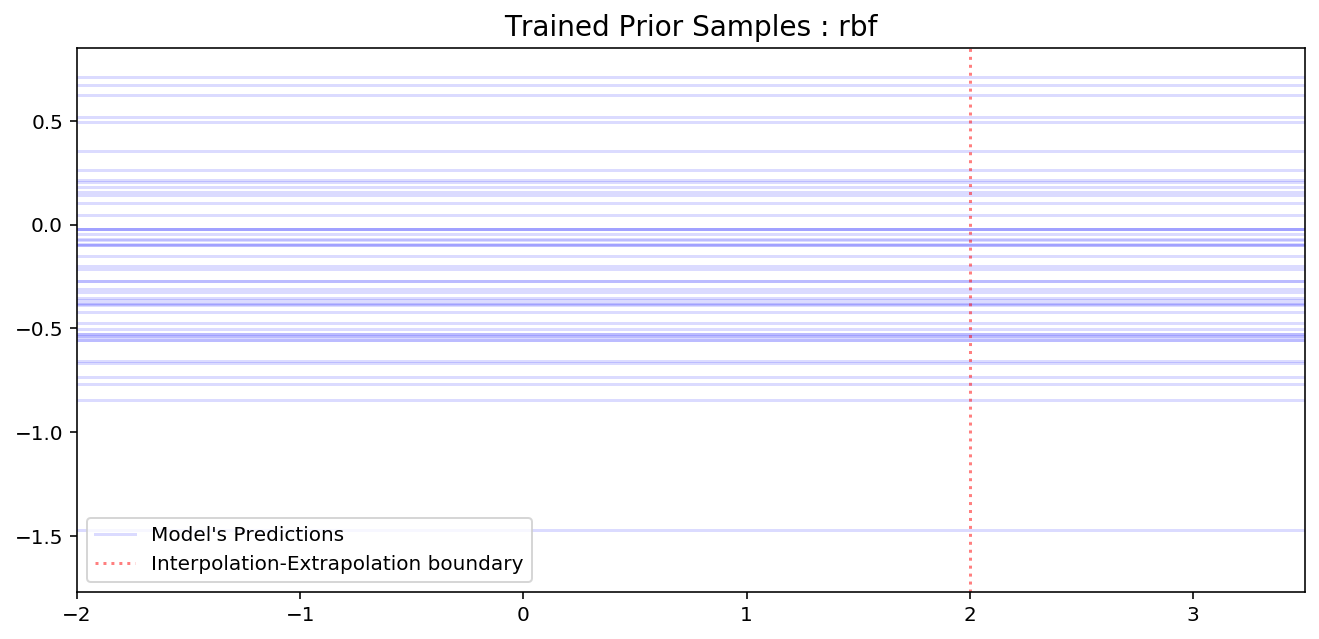

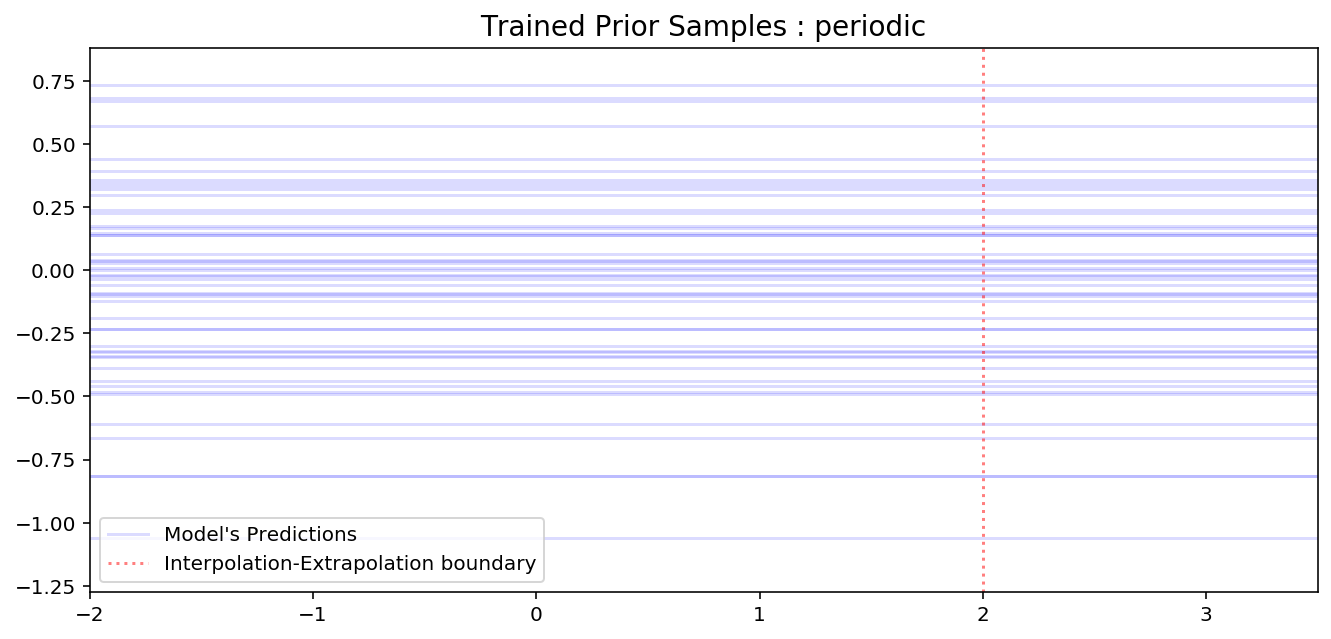

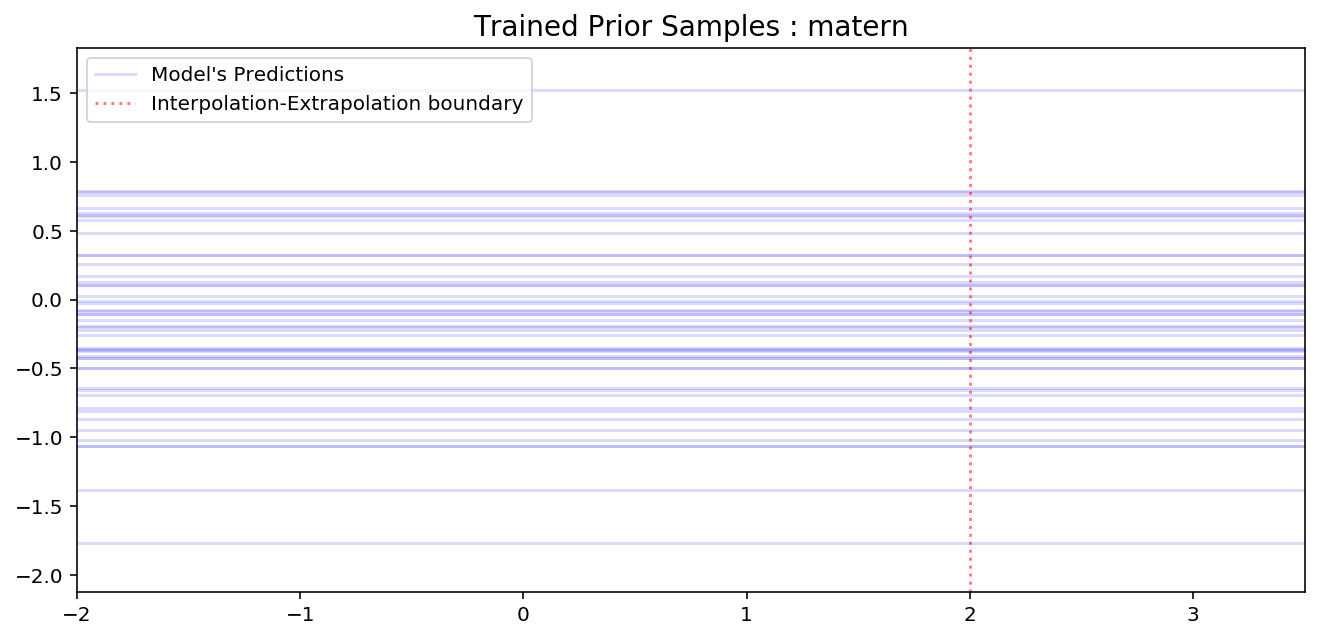

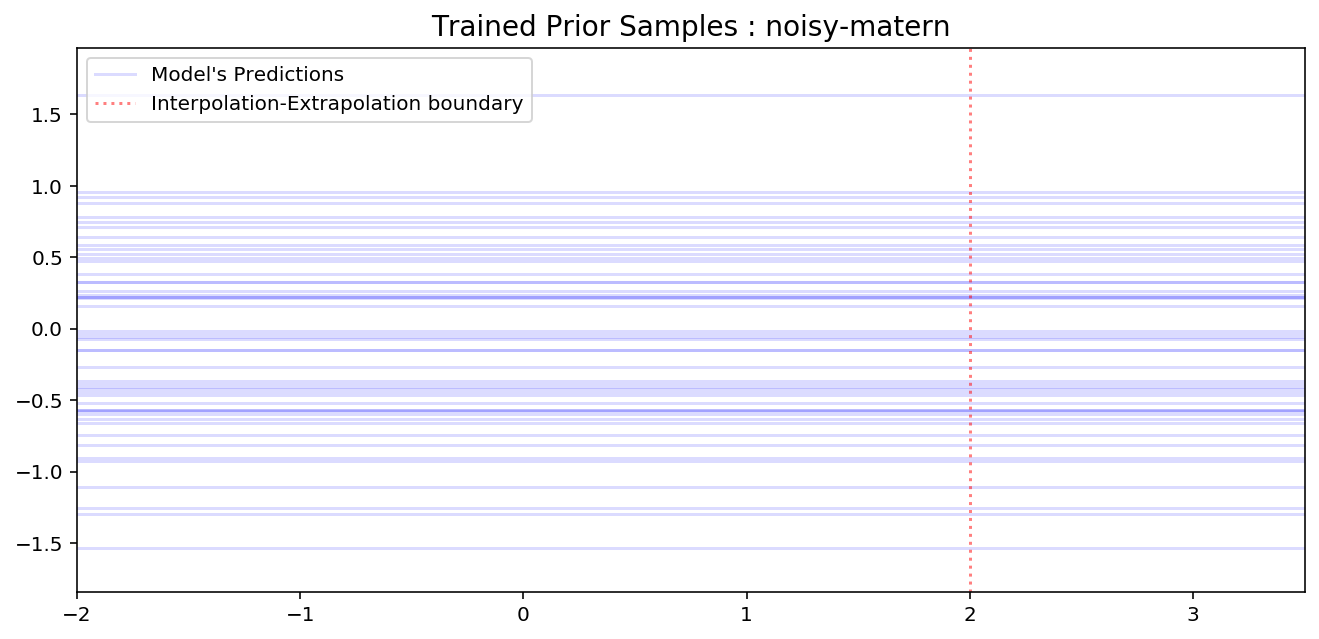

In [10]:
for k,(neural_proc, dataset) in data_models.items():
    plot_prior_samples(neural_proc, 
                       title="Trained Prior Samples : {}".format(k), 
                       test_min_max=EXTRAPOLATION_RANGE, 
                       train_min_max=INTERPOLATION_RANGE)

# Posterior

std: 0.35302820801734924
std: 0.7000594139099121
std: 0.3430330753326416
std: 0.4837394654750824


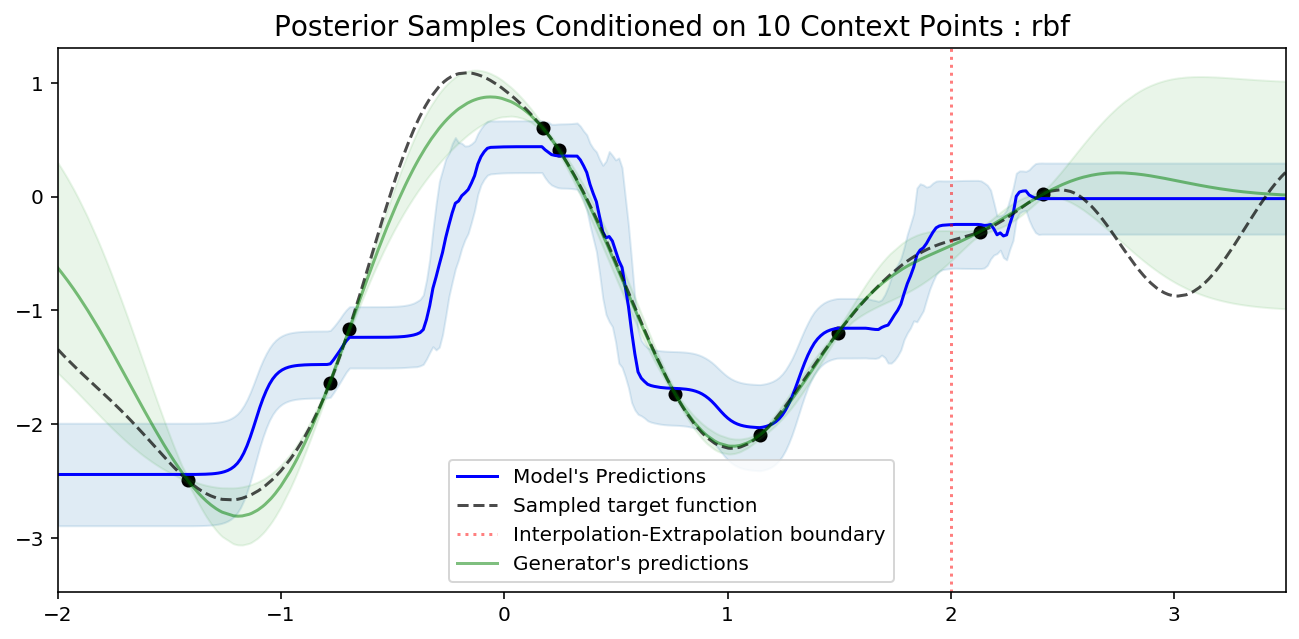

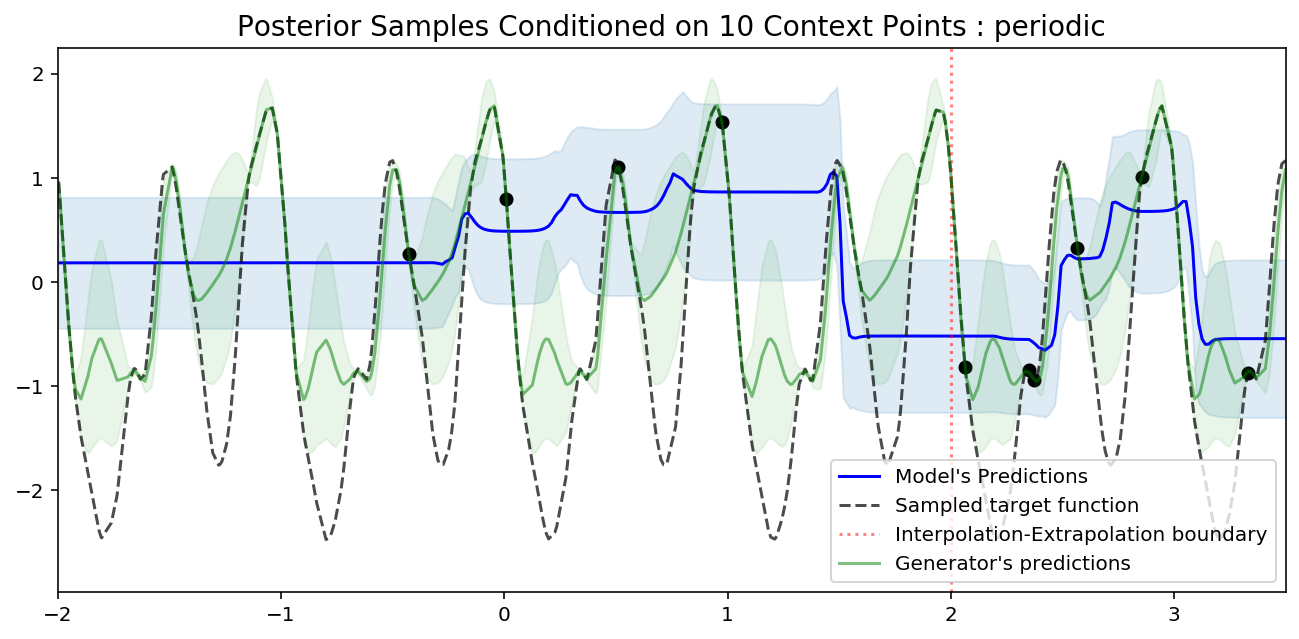

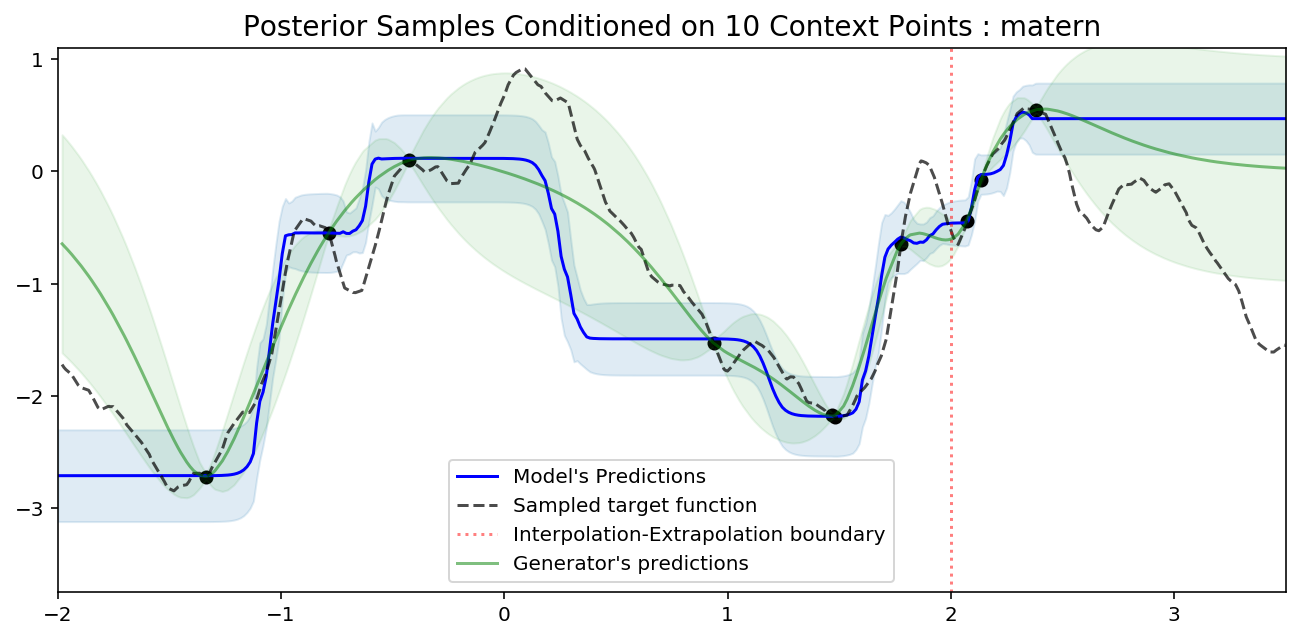

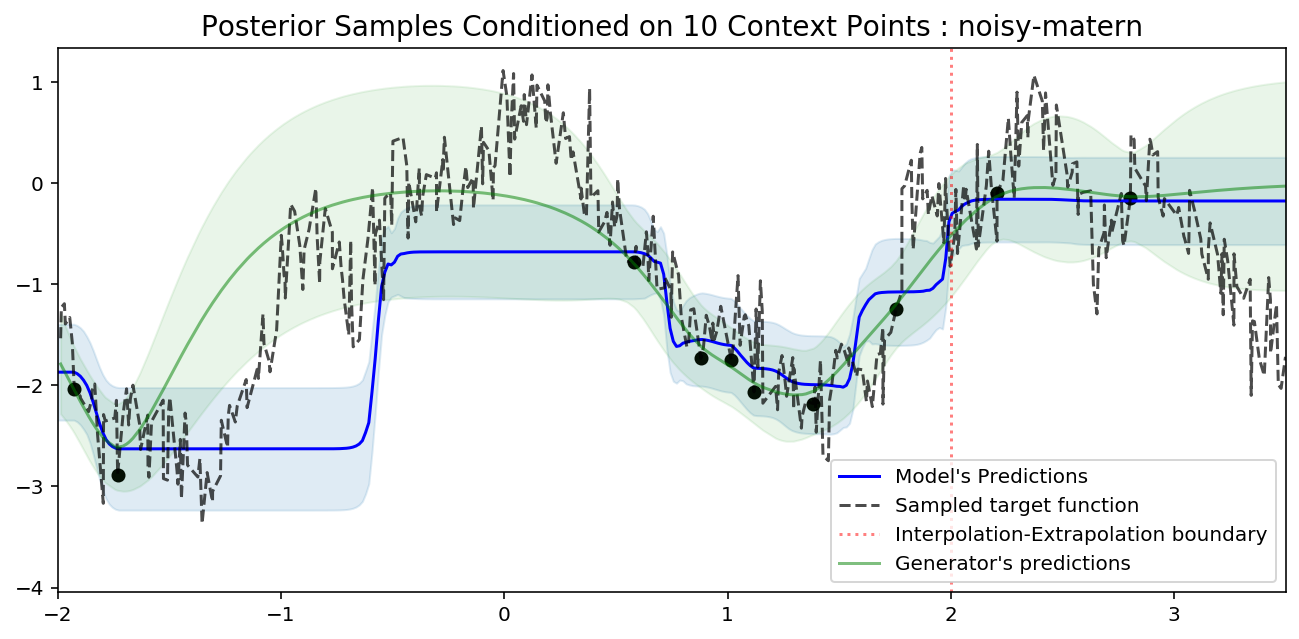

In [11]:
N_CNTXT = 10
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=3*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

std: 0.3142898976802826
std: 0.7828025817871094
std: 0.38084566593170166
std: 0.47397786378860474


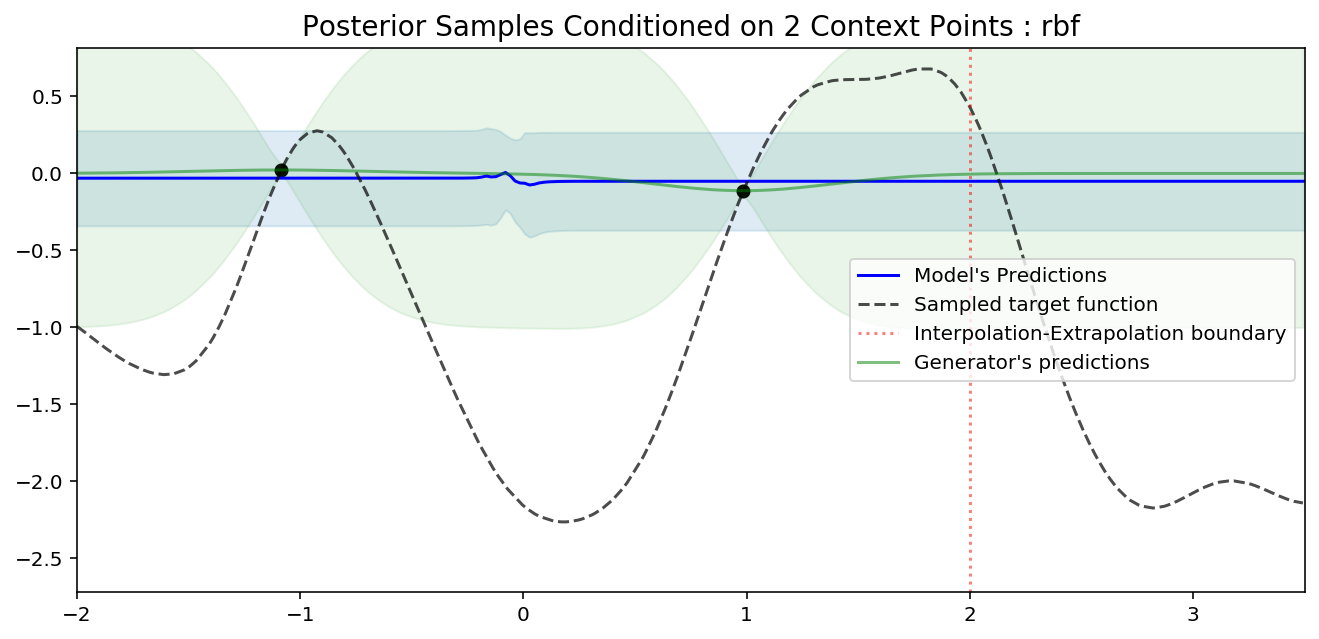

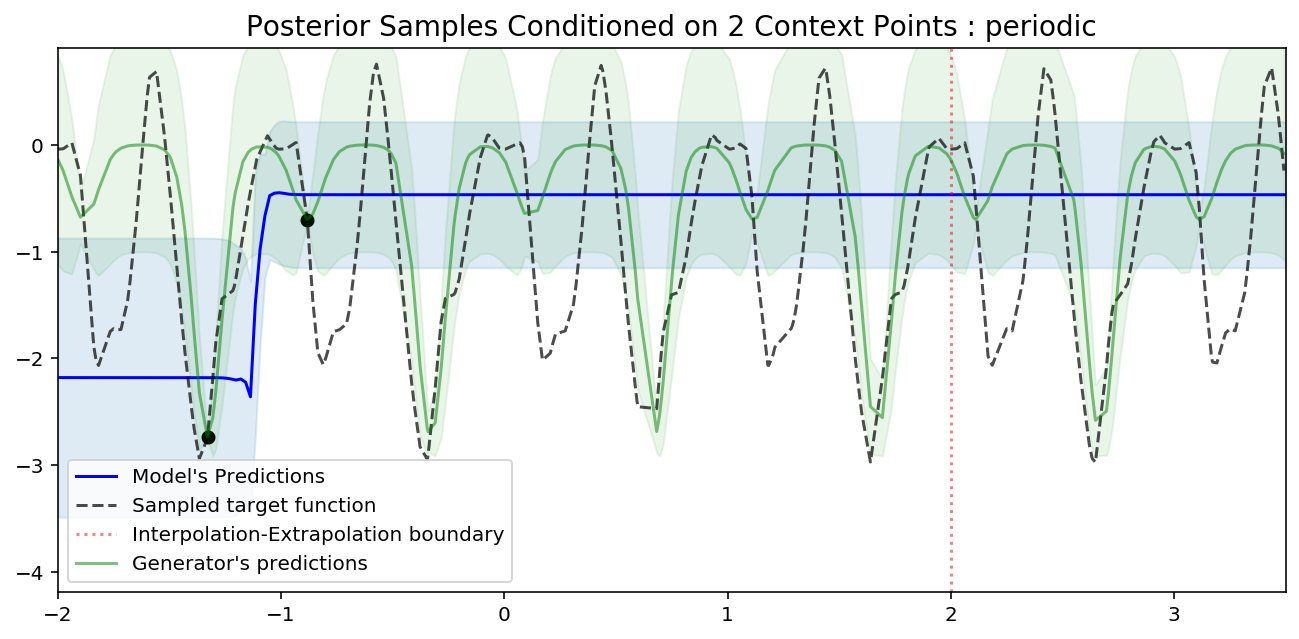

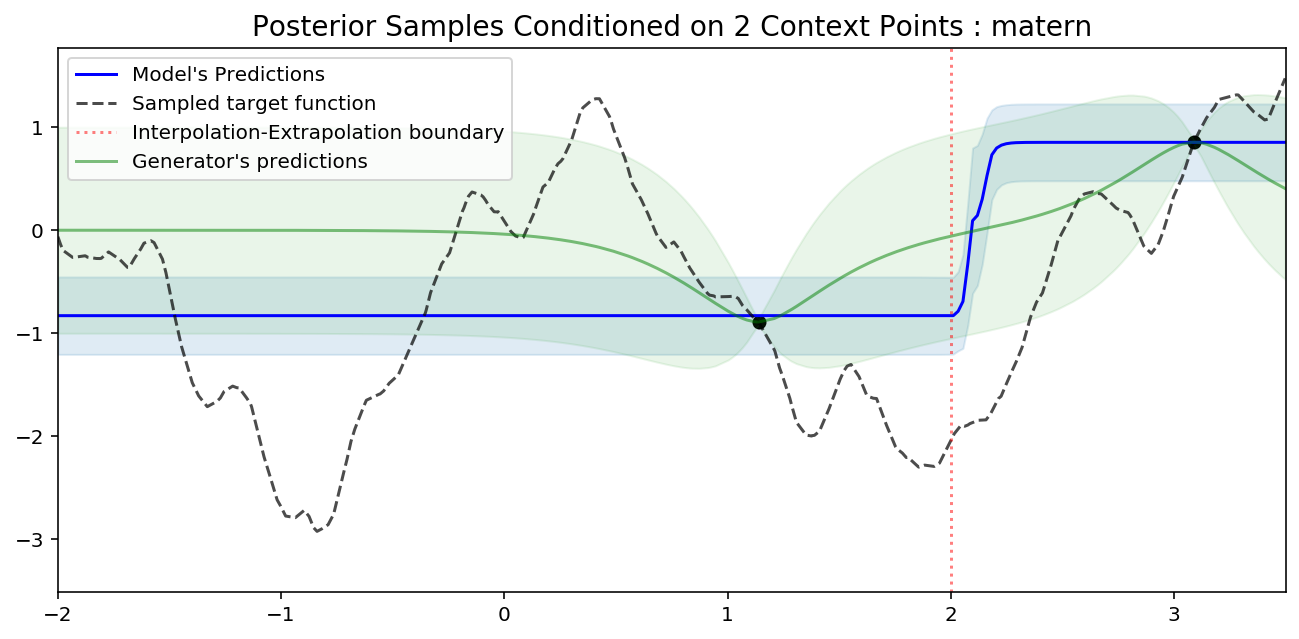

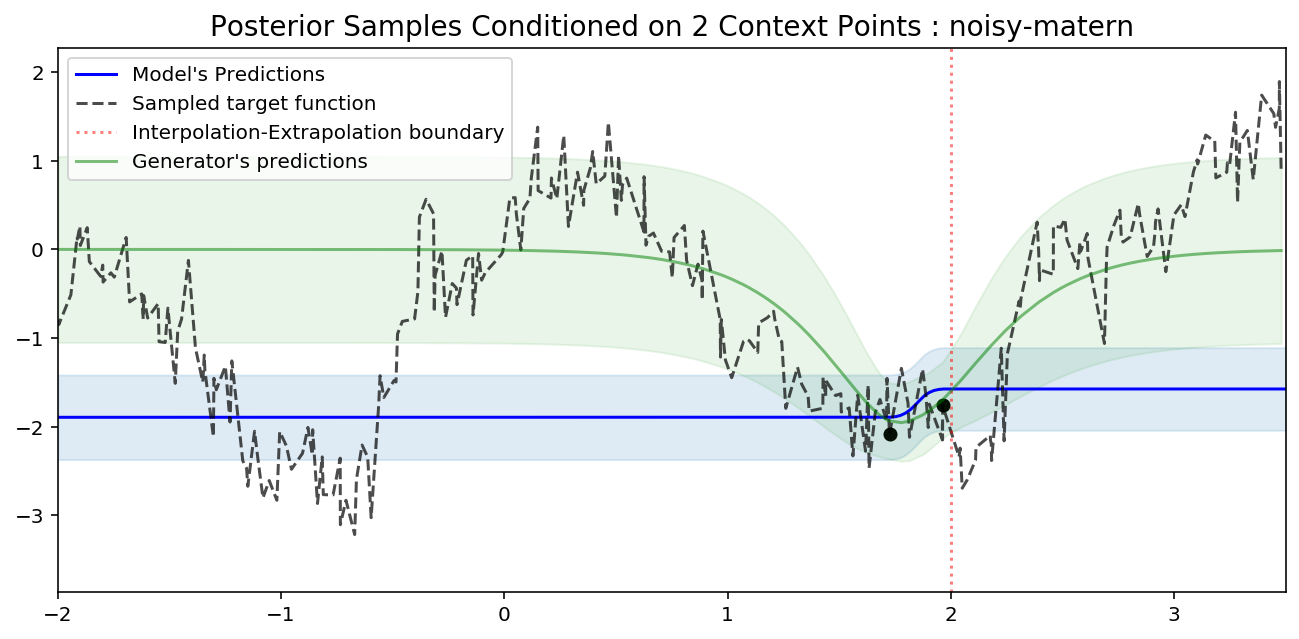

In [12]:
N_CNTXT = 2
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=2*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

std: 0.4252135157585144
std: 0.8120630979537964
std: 0.32411885261535645
std: 0.41538023948669434


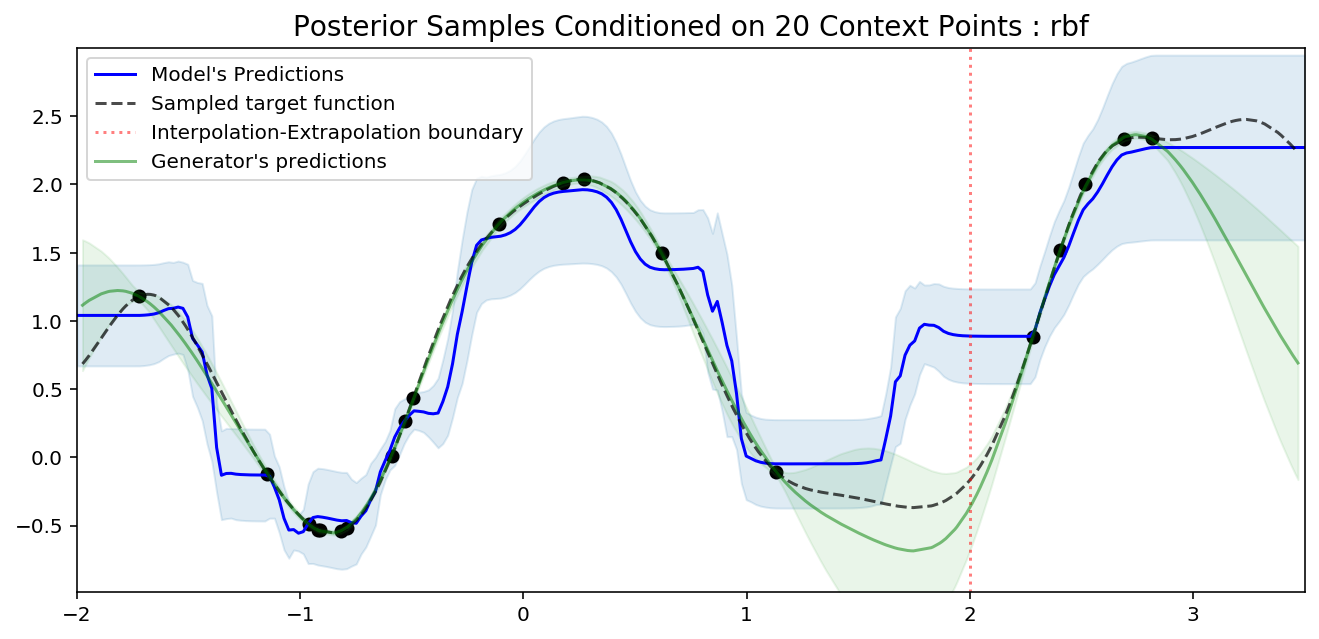

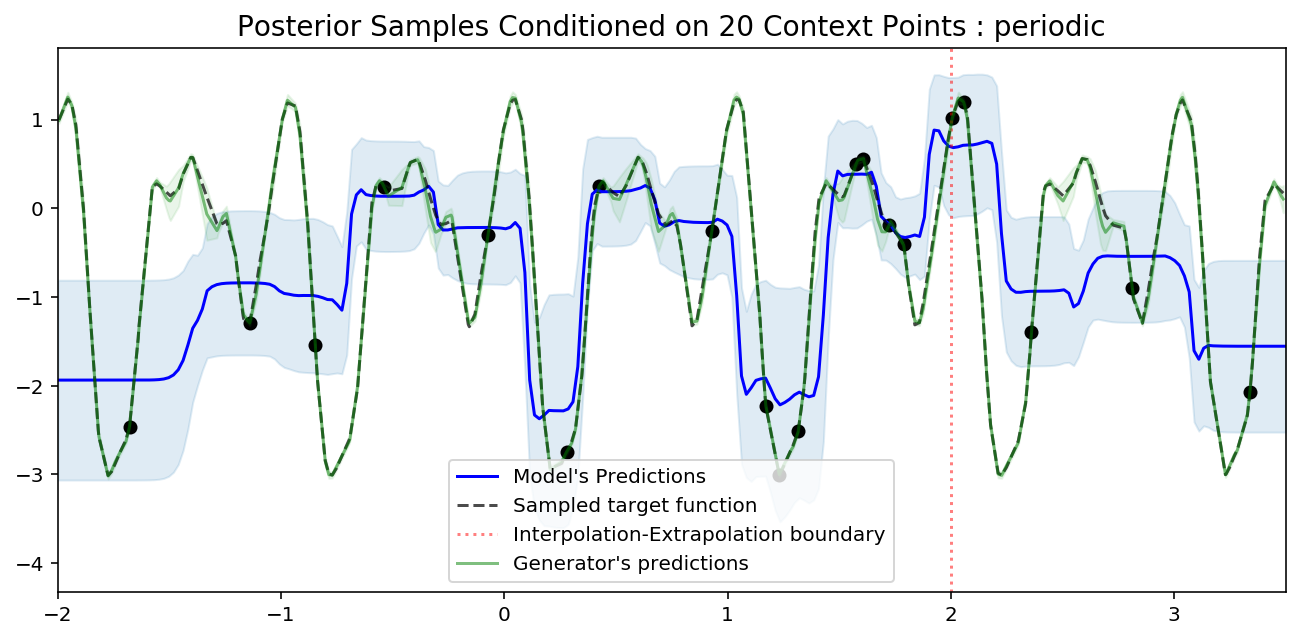

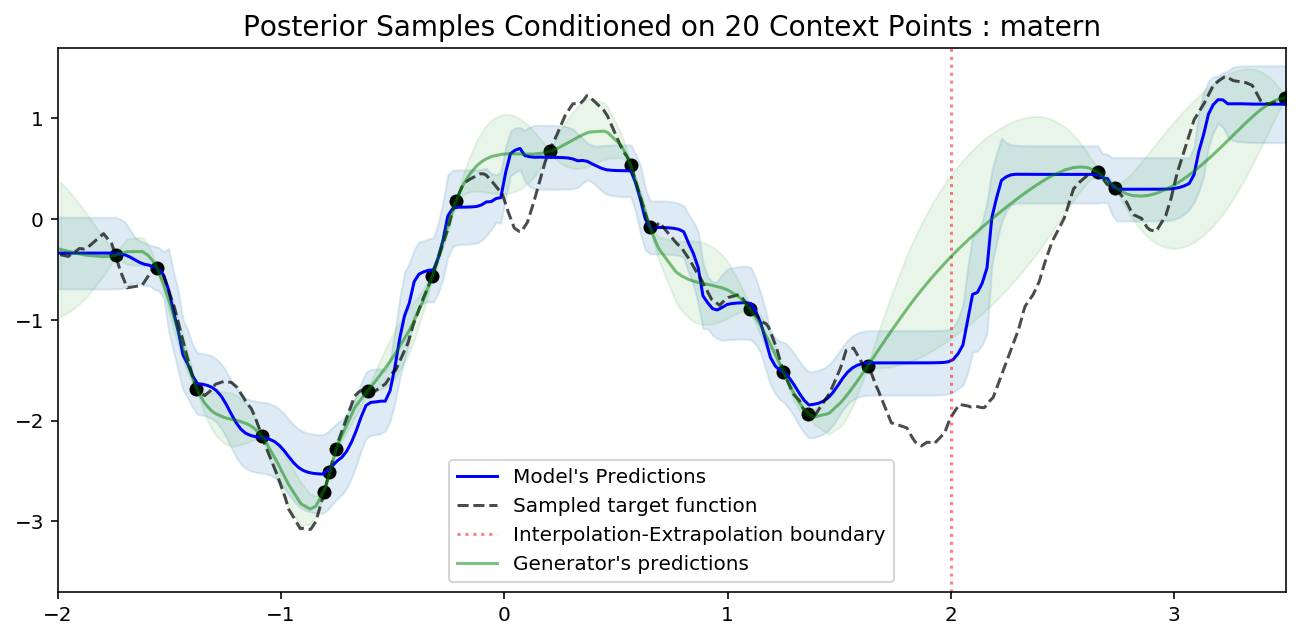

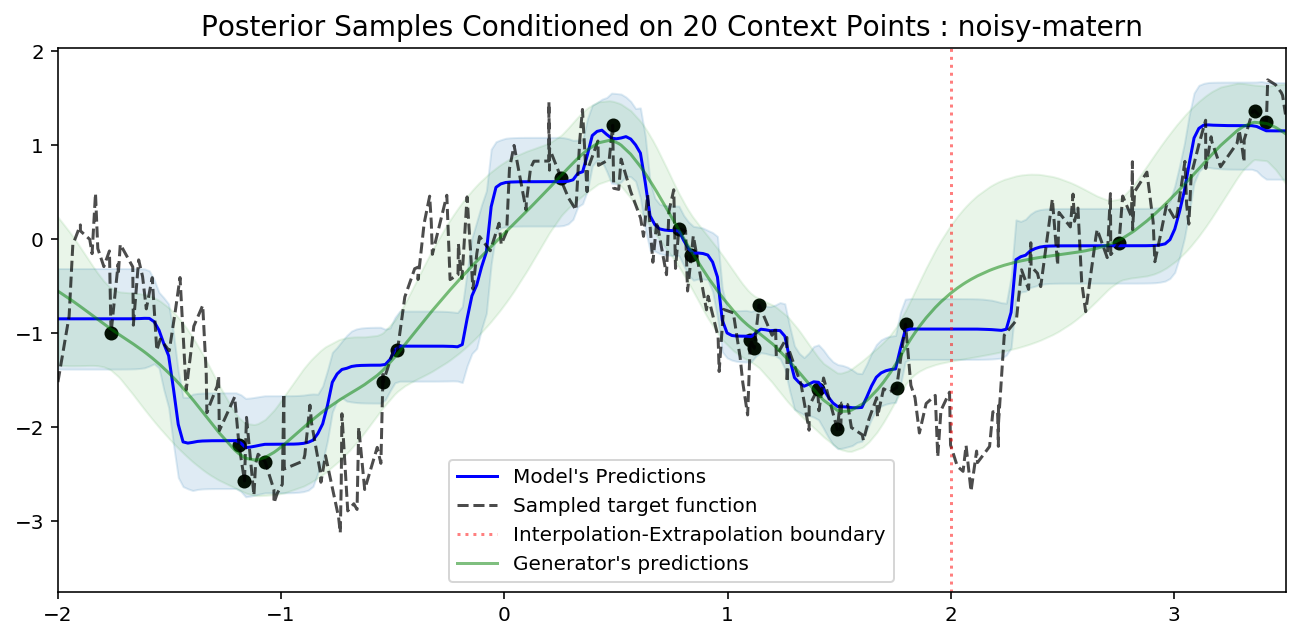

In [13]:
N_CNTXT = 20
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=2*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

std: 0.4245395362377167
std: 0.9169768691062927
std: 0.3850770592689514
std: 0.4233226478099823


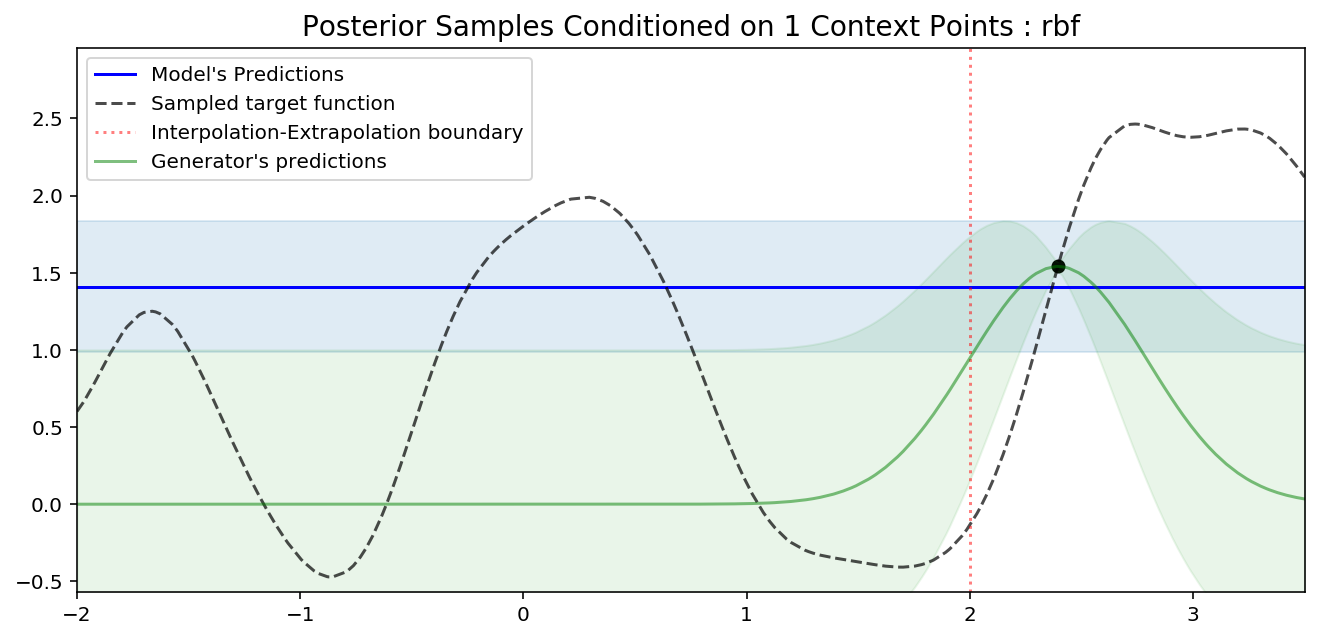

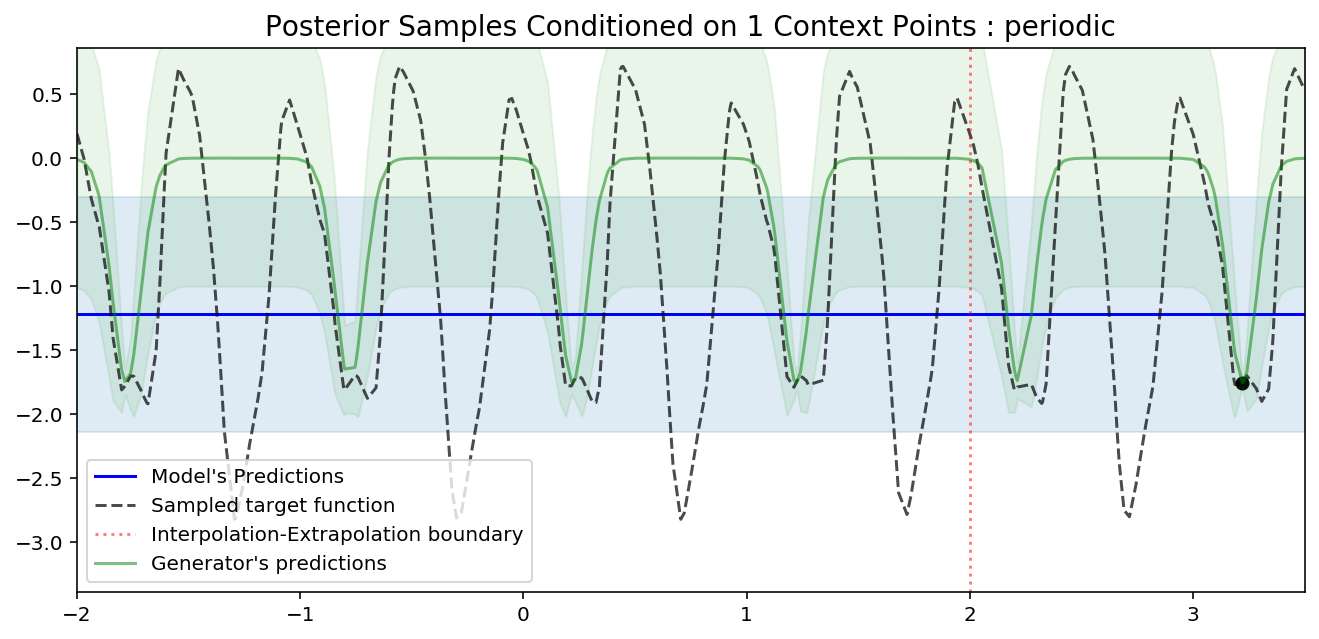

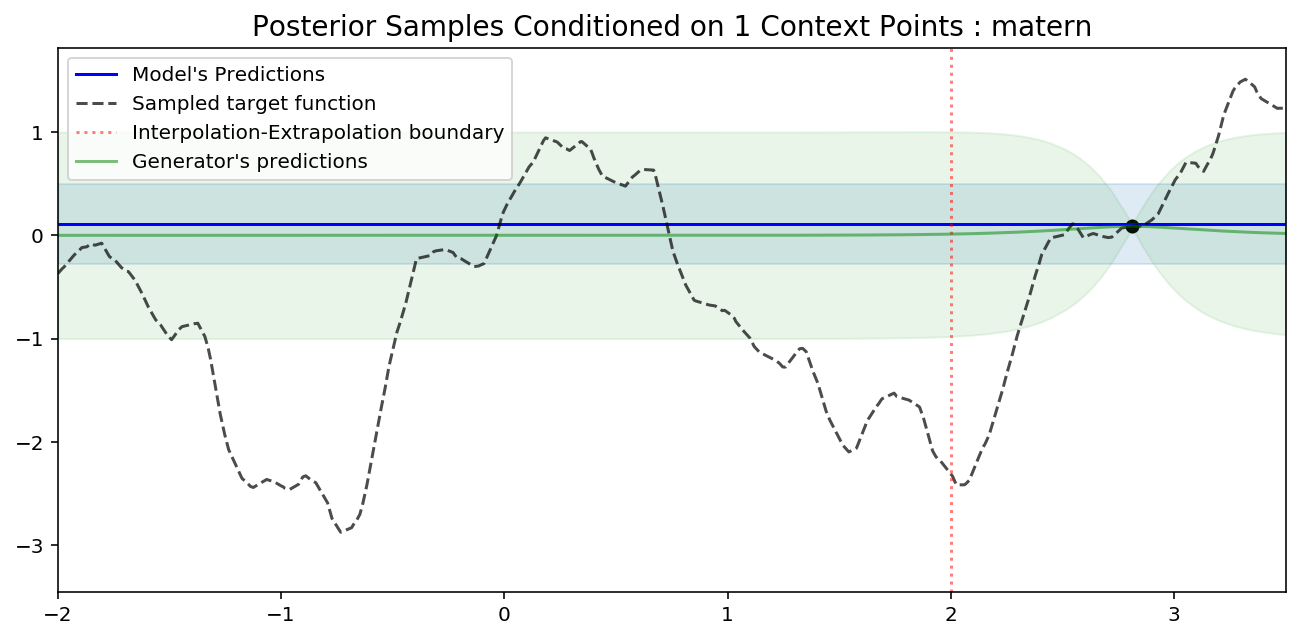

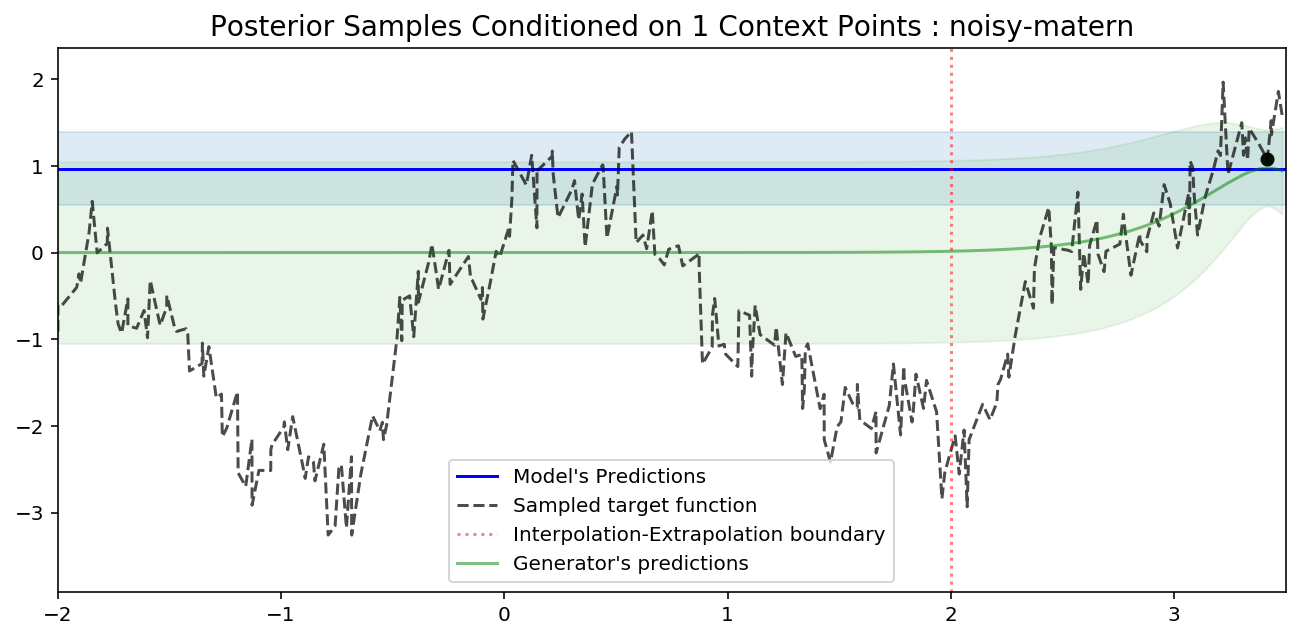

In [14]:
N_CNTXT = 1
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=2*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))